In [146]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

In [147]:
df = pd.read_csv('crime-housing-austin-2015.csv')

In [148]:
# Convert dollar and percent values to floats
for col in df.select_dtypes(include=['object']):
    if '$' in df[col].iloc[0] or '%' in df[col].iloc[0]:
        df[col] = df[col].str.replace('\$|%', '').astype('float')
        
# Convert zip codes to str
df['Zip_Code_Crime'] = df['Zip_Code_Crime'].fillna(-1).astype('int32').apply(str)
df['Zip_Code_Housing'] = df['Zip_Code_Housing'].fillna(-1).astype('int32').apply(str)

In [102]:
df.head()

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68.0,10.0,97.0,42.0,23.0,38.0,97.0,98.0,550.0,40.0
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81.0,87.0,100.0,100.0,89.0,26.0,44.0,63.0,708.0,40.0


In [104]:
df.columns

Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

In [149]:
# Impute missing data
num_subset = df.columns[14:]

for col in num_subset:
    # Zipcode specific imputation
    df[col].fillna(df.groupby('Zip_Code_Crime')[col].median(), inplace=True)
    # For cases where all data is missing from zipcode
    df[col].fillna(df[col].median(), inplace=True)

In [154]:
# Find high correlations
from itertools import combinations

df_subset = df[num_subset]
combs = combinations(df_subset.columns, 2)

corrs = []
for comb in combs:
    corr, pval = stats.pearsonr(df_subset[comb[0]], df_subset[comb[1]])
    if corr >= 0.4:
        corrs.append((comb, corr, pval))
        
corrs.sort(key=lambda x: x[1], reverse=True)

In [155]:
corrs

[(('Homesaffordabletopeopleearninglessthan$50000',
   'Ownerunitsaffordabletoaverageteacher'),
  0.9965572497330543,
  0.0),
 (('Rentalsaffordabletopeopleearninglessthan$25000',
   'Rentalunitsaffordabletoaverageretail/serviceworker'),
  0.984549676502607,
  0.0),
 (('Ownerunitsaffordabletoaverageretail/serviceworker',
   'Ownerunitsaffordabletoaverageartist'),
  0.9408826613139355,
  0.0),
 (('Ownerunitsaffordabletoaverageartist',
   'Ownerunitsaffordabletoaverageteacher'),
  0.9293125008245713,
  0.0),
 (('Homesaffordabletopeopleearninglessthan$50000',
   'Ownerunitsaffordabletoaverageartist'),
  0.9050512428582433,
  0.0),
 (('Percentageofrentalunitsinpoorcondition',
   'Rentalunitsaffordabletoaverageretail/serviceworker'),
  0.8883487176866991,
  0.0),
 (('Rentalunitsaffordabletoaverageteacher',
   'Rentalunitsaffordabletoaveragetechworker'),
  0.8679726567930278,
  0.0),
 (('Rentalsaffordabletopeopleearninglessthan$25000',
   'Percentageofrentalunitsinpoorcondition'),
  0.86017038

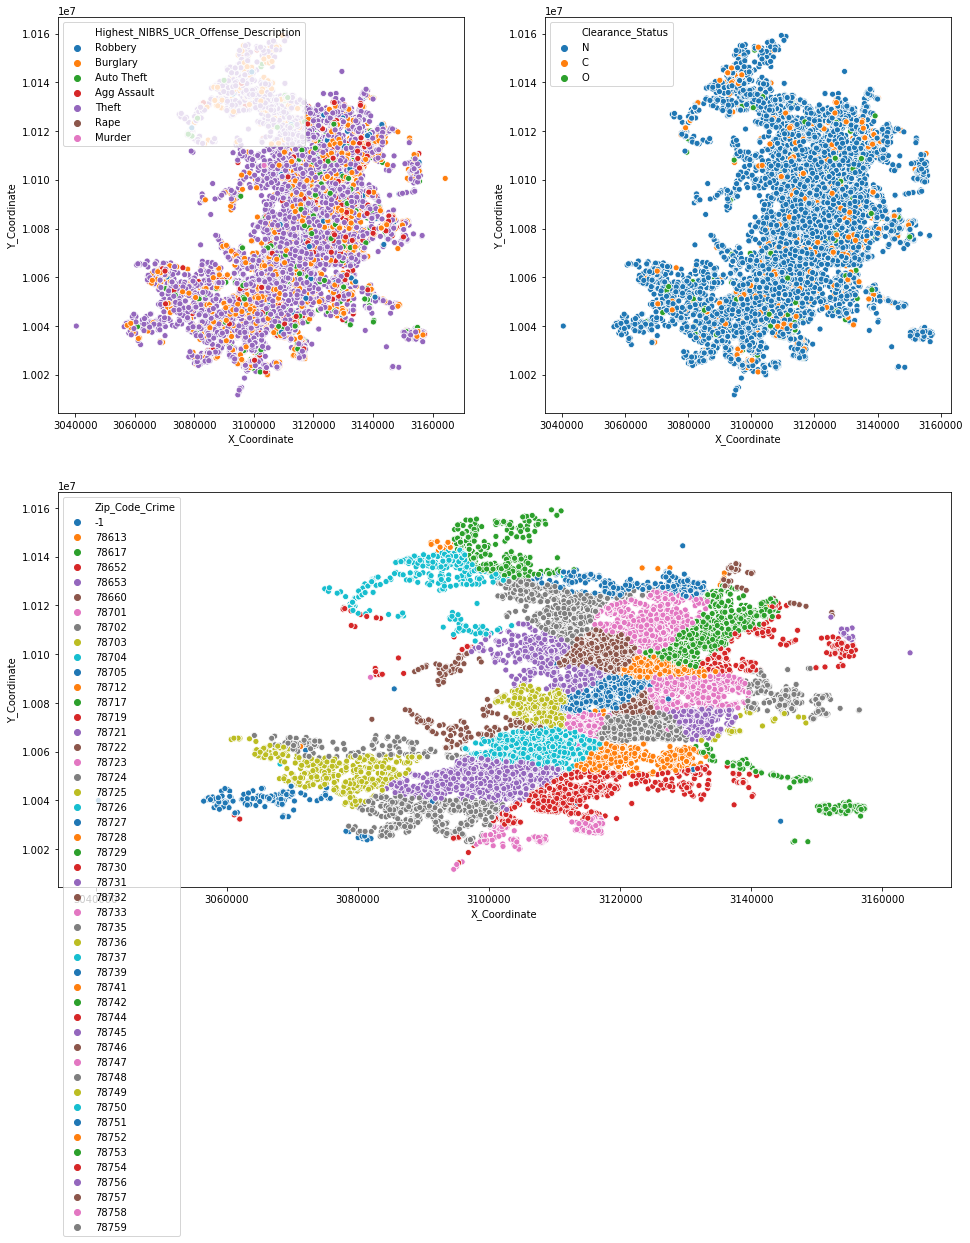

In [152]:
# Scatter plot of crime location
plt.figure(figsize=(16, 16))
sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Highest_NIBRS_UCR_Offense_Description', data=df, ax=plt.subplot(221))
sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Clearance_Status', data=df, ax=plt.subplot(222))
sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Zip_Code_Crime', data=df, ax=plt.subplot(212), palette=sns.color_palette(n_colors=df['Zip_Code_Crime'].nunique()))
plt.show()